# Cost Function

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv("weight-height.csv")
df.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
x = df[["Height"]].values
y_true = df[["Weight"]].values

In [15]:
def line(x, w=0, b=0):
    return w*x+b

def mean_squared_error(y_true, y_pred):
    s=(y_true - y_pred)**2
    return np.sqrt(s.mean())

Text(0.5, 0, 'b')

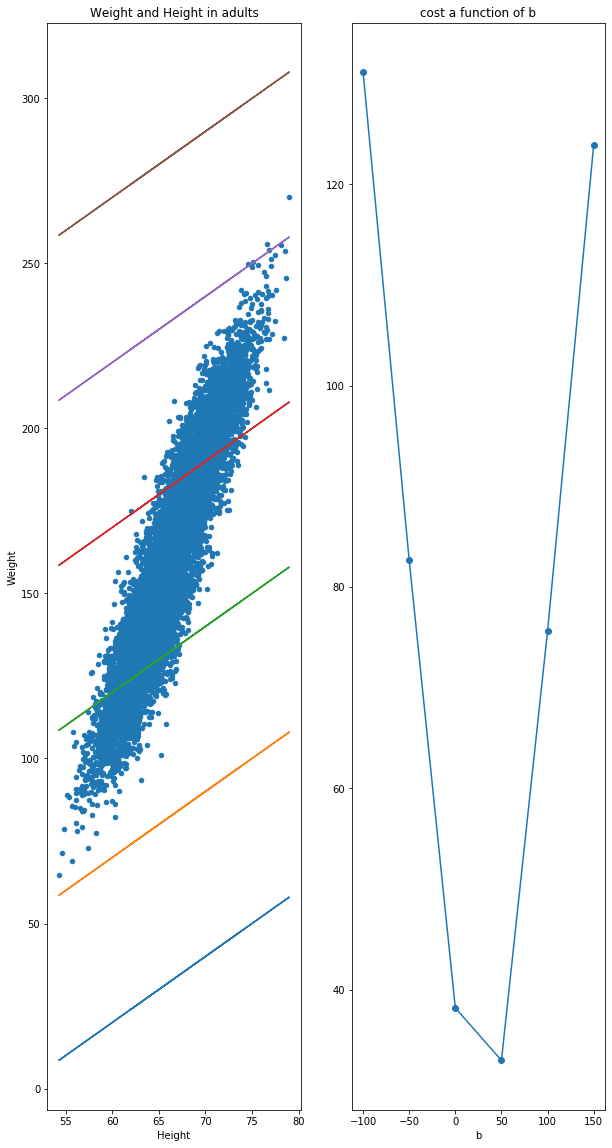

In [21]:
plt.figure(figsize=(10,20))
axl=plt.subplot(121)
df.plot(kind="scatter", x="Height", y="Weight",title="Weight and Height in adults", ax=axl)
bs=np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
    y_pred=line(x, w=2, b=b)
    mse=mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(x, y_pred)

ax2=plt.subplot(122)
plt.plot(bs,mses,"o-")
plt.title("cost a function of b")
plt.xlabel("b")

# Linear Regression with keras

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD


In [23]:
df = pd.read_csv("weight-height.csv")
df.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [24]:
x = df[["Height"]].values
y_true = df[["Weight"]].values

In [26]:
x

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [27]:
x.shape

(10000, 1)

In [28]:
model= Sequential()
model.add(Dense(1,input_shape=(1,)))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(Adam(lr=0.8), "mean_squared_error")

In [31]:
model.fit(x,y_true, epochs=40)

Train on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 2s 168us/sample - loss: 976.0222
Epoch 2/40
10000/10000 [==============================] - 0s 32us/sample - loss: 564.8473
Epoch 3/40
10000/10000 [==============================] - 0s 32us/sample - loss: 513.2830
Epoch 4/40
10000/10000 [==============================] - 0s 32us/sample - loss: 490.4109
Epoch 5/40
10000/10000 [==============================] - 0s 32us/sample - loss: 425.1221
Epoch 6/40
10000/10000 [==============================] - 0s 34us/sample - loss: 403.7063
Epoch 7/40
10000/10000 [==============================] - 0s 31us/sample - loss: 343.6808
Epoch 8/40
10000/10000 [==============================] - 0s 32us/sample - loss: 326.0229
Epoch 9/40
10000/10000 [==============================] - 0s 32us/sample - loss: 307.1912
Epoch 10/40
10000/10000 [==============================] - 0s 34us/sample - loss: 275.8852
Epoch 11/40
10000/10000 [==============================] - 0s 34us/sample -

In [32]:
y_pred=model.predict(x)

In [33]:
y_pred

array([[218.53479],
       [179.65912],
       [220.55402],
       ...,
       [141.94397],
       [181.59583],
       [127.17886]], dtype=float32)

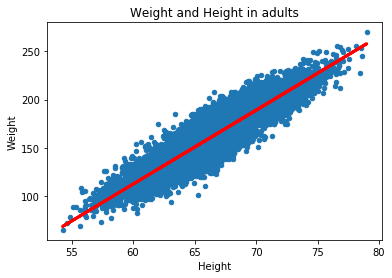

In [34]:
df.plot(kind="scatter", x="Height", y="Weight",title="Weight and Height in adults")
plt.plot(x,y_pred,color="red",linewidth=3)

In [37]:
w,b=model.get_weights()

In [38]:
w

array([[7.6751795]], dtype=float32)

In [39]:
b

array([-348.25433], dtype=float32)

In [40]:
model.predict([[200]])

array([[1186.7815]], dtype=float32)